In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from IPython.display import Markdown


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

In [2]:
test_df = pd.read_csv("../data/bank-additional/bank-additional-full.csv",sep=';')

In [3]:
test_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
test_df.shape

(41188, 21)

In [5]:
# check for NAs
test_df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
test_df.isin([-np.inf,np.inf]).any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [7]:
test_df[test_df == "unknown"] = np.nan

In [8]:
# check for NAs
test_df.isna().any()

age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

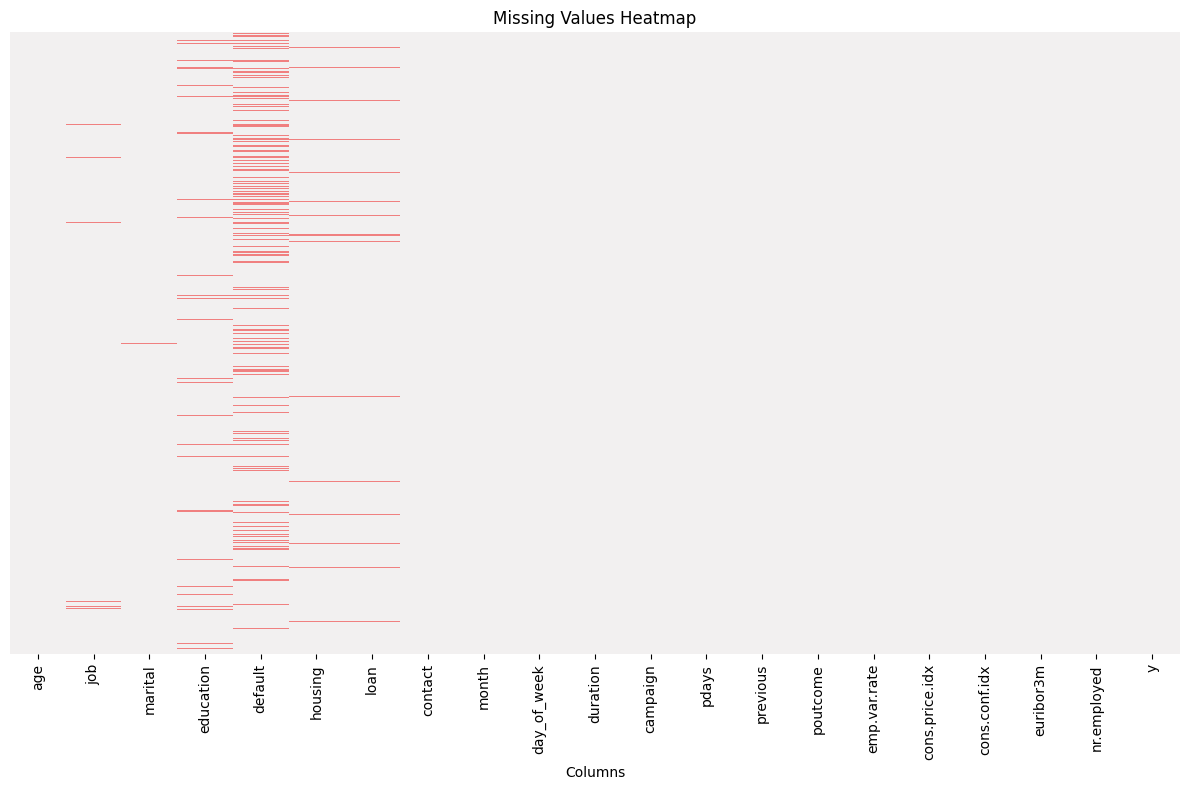

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    test_df.isnull(), 
    cbar=False, 
    cmap=sns.light_palette("lightcoral", as_cmap=True),  # Pastel/light color
    yticklabels=False,
)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

Removing columns emp.var.rate, cons.price.idx,euribor3m and nr.employed as it is not present in the current model     

In [10]:
test_df = test_df.drop(columns=['emp.var.rate', 'cons.price.idx','euribor3m','nr.employed','cons.conf.idx'],axis=0)

Imputing rest missing values

In [11]:
# Encode categorical columns
categorical_cols = test_df.select_dtypes(include=['object', 'category']).columns
encoder = OrdinalEncoder()
test_df[categorical_cols] = encoder.fit_transform(test_df[categorical_cols].astype(str))

In [12]:
# Impute all columns
imputer = IterativeImputer(random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)

# Decode categorical columns back
df_imputed[categorical_cols] = encoder.inverse_transform(df_imputed[categorical_cols])

In [13]:
df_imputed.isna().any()

age            False
job            False
marital        False
education      False
default        False
housing        False
loan           False
contact        False
month          False
day_of_week    False
duration       False
campaign       False
pdays          False
previous       False
poutcome       False
y              False
dtype: bool

In [14]:
test_df.to_csv("../data/processed/bank-dataset-additional-processed.csv")